2500 2500 2500 2500


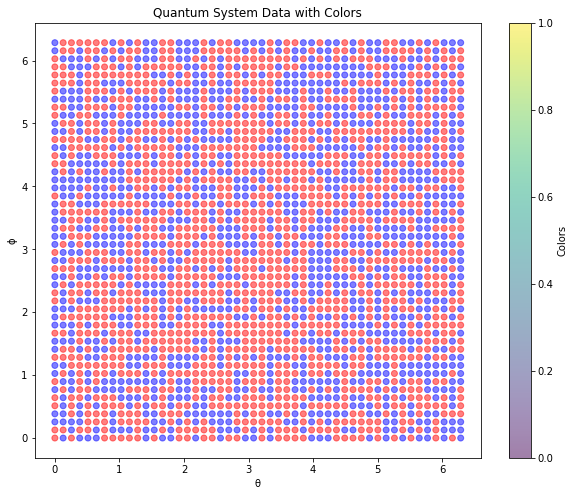

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Generate colors for each data point
# Ensure that 'colors' has the same length as 'theta_values' and 'phi_values'
colors = data['colors']

print (len(theta_values), len(phi_values), len(results), len(colors))
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(theta_values, phi_values, c=colors, alpha=0.5)
plt.xlabel('θ')
plt.ylabel('ϕ')
plt.title('Quantum System Data with Colors')
plt.colorbar(label='Colors')  # Add a colorbar to the plot to show the mapping of colors
plt.show()


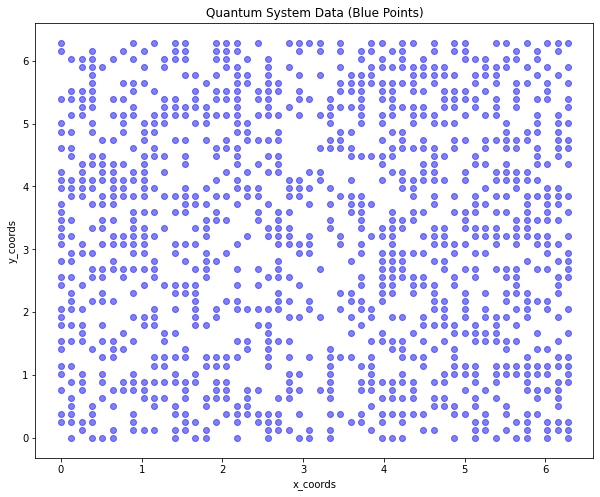

In [11]:
import json
import matplotlib.pyplot as plt


# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Filter data points that are colored blue
blue_x_coords = [x for i, x in enumerate(theta_values) if colors[i] == 'blue']
blue_y_coords = [y for i, y in enumerate(phi_values) if colors[i] == 'blue']

# Create a scatter plot for the blue data points
plt.figure(figsize=(10, 8))
plt.scatter(blue_x_coords, blue_y_coords, c='blue', alpha=0.5)
plt.xlabel('x_coords')
plt.ylabel('y_coords')
plt.title('Quantum System Data (Blue Points)')
plt.show()


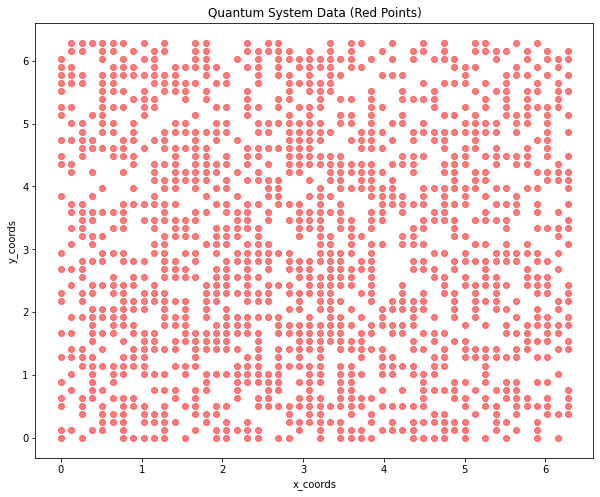

In [12]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Filter data points that are colored red
red_x_coords = [x for i, x in enumerate(theta_values) if colors[i] == 'red']
red_y_coords = [y for i, y in enumerate(phi_values) if colors[i] == 'red']

# Create a scatter plot for the red data points
plt.figure(figsize=(10, 8))
plt.scatter(red_x_coords, red_y_coords, c='red', alpha=0.5)
plt.xlabel('x_coords')
plt.ylabel('y_coords')
plt.title('Quantum System Data (Red Points)')
plt.show()


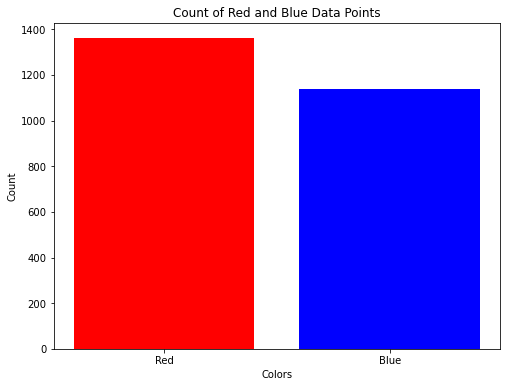

Red Count: 1361
Blue Count: 1139


In [13]:
red_count = colors.count('red')
blue_count = colors.count('blue')

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
plt.bar(['Red', 'Blue'], [red_count, blue_count], color=['red', 'blue'])
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Count of Red and Blue Data Points')
plt.show()

# Print the counts
print(f'Red Count: {red_count}')
print(f'Blue Count: {blue_count}')

In [15]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data['theta_values'], data['phi_values']))
y = data['colors']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f'{name} - Accuracy: {accuracy:.3f}')
    print(f'{name} - F1-score for Blue: {report["blue"]["f1-score"]:.3f}')
    print(f'{name} - F1-score for Red: {report["red"]["f1-score"]:.3f}')
    print()


Logistic Regression - Accuracy: 0.554
Logistic Regression - F1-score for Blue: 0.067
Logistic Regression - F1-score for Red: 0.707

Decision Tree - Accuracy: 0.494
Decision Tree - F1-score for Blue: 0.465
Decision Tree - F1-score for Red: 0.520

Random Forest - Accuracy: 0.506
Random Forest - F1-score for Blue: 0.447
Random Forest - F1-score for Red: 0.553

Gradient Boosting - Accuracy: 0.504
Gradient Boosting - F1-score for Blue: 0.303
Gradient Boosting - F1-score for Red: 0.615

Support Vector Machine - Accuracy: 0.564
Support Vector Machine - F1-score for Blue: 0.128
Support Vector Machine - F1-score for Red: 0.709



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.3f}')
print(f'Random Forest - Classification Report:\n{classification_report_rf}')


Random Forest - Accuracy: 0.484
Random Forest - Classification Report:
              precision    recall  f1-score   support

        blue       0.42      0.43      0.43       221
         red       0.54      0.52      0.53       279

    accuracy                           0.48       500
   macro avg       0.48      0.48      0.48       500
weighted avg       0.49      0.48      0.48       500



In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the MLP classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp)

print(f'MLP Classifier - Accuracy: {accuracy_mlp:.3f}')
print(f'MLP Classifier - Classification Report:\n{classification_report_mlp}')


MLP Classifier - Accuracy: 0.554
MLP Classifier - Classification Report:
              precision    recall  f1-score   support

        blue       0.49      0.20      0.29       221
         red       0.57      0.83      0.68       279

    accuracy                           0.55       500
   macro avg       0.53      0.52      0.48       500
weighted avg       0.53      0.55      0.50       500



In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data['theta_values'], data['phi_values']))
le = LabelEncoder()
y = le.fit_transform(data['colors'])  # Encode labels to numerical values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define an even deeper neural network with more hidden layers
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions on the testing data
y_pred_even_deeper_dnn = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate the even deeper neural network
accuracy_even_deeper_dnn = accuracy_score(y_test, y_pred_even_deeper_dnn)
classification_report_even_deeper_dnn = classification_report(y_test, y_pred_even_deeper_dnn)

print(f'Even Deeper Neural Network - Accuracy: {accuracy_even_deeper_dnn:.3f}')
print(f'Even Deeper Neural Network - Classification Report:\n{classification_report_even_deeper_dnn}')


KeyboardInterrupt: 

In [71]:
from qiskit import Aer
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json
import numpy as np
import matplotlib.pyplot as plt


# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data['theta_values'], data['phi_values']))
le = LabelEncoder()
y = le.fit_transform(data['colors'])  # Encode labels to numerical values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the variables to inspect their values and their lengths
#print("X:\n", X, "\nLength of X:", len(X))
#print("Label Encoder:\n", le)
#print("y:\n", y, "\nLength of y:", len(y))
#print("X_train:\n", X_train, "\nLength of X_train:", len(X_train))
#print("X_test:\n", X_test, "\nLength of X_test:", len(X_test))
#print("y_train:\n", y_train, "\nLength of y_train:", len(y_train))
#print("y_test:\n", y_test, "\nLength of y_test:", len(y_test))

# Define the feature map and ansatz
feature_map = RealAmplitudes(num_qubits=2, reps=1)  # 'reps' is the repetition of the basic building block
ansatz = RealAmplitudes(num_qubits=2, reps=1)

# Plot the feature map and ansatz
feature_map.draw('mpl', filename='feature_map.png')  # This will save the plot to a file named 'feature_map.png'
ansatz.draw('mpl', filename='ansatz.png')  # This will save the plot to a file named 'ansatz.png'

# If you want to display the plots within the notebook, you can use the following:
feature_map.draw('mpl')
plt.show()  # This will display the feature map
ansatz.draw('mpl')
plt.show()  # This will display the ansatz

# Define the optimizer
optimizer = COBYLA()


# Prepare datasets in dictionary format
training_data = {'A': X_train[y_train == 0], 'B': X_train[y_train == 1]}
test_data = {'A': X_test[y_test == 0], 'B': X_test[y_test == 1]}

backend = Aer.get_backend('qasm_simulator')  # Use the QASM simulator
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=42, seed_transpiler=42)


# Initializing the VQC
vqc = VQC(optimizer=optimizer,
          feature_map=feature_map,
          ansatz=ansatz,
          quantum_instance=quantum_instance)

# Train the model
vqc.fit(training_data)

# Test the model and get accuracy
accuracy = vqc.score(test_data)
print("Testing accuracy: {}".format(accuracy))



/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_13309/3597190655.py:58: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=42, seed_transpiler=42)


CircuitError: 'Name conflict on adding parameter: θ[0]'

In [4]:
from sklearn.preprocessing import StandardScaler
import tensorflow
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data['theta_values'], data['phi_values']))
le = LabelEncoder()
y = le.fit_transform(data['colors'])  # Encode labels to numerical values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalize the data
scaler = StandardScaler().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=32, validation_data=(X_test_normalized, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_normalized, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/500
63/63 [==============================] - 1s 7ms/step - loss: 0.6952 - accuracy: 0.5030 - val_loss: 0.6894 - val_accuracy: 0.5540
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5340 - val_loss: 0.6873 - val_accuracy: 0.5600
Epoch 3/500
63/63 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5395 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 4/500
63/63 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5450 - val_loss: 0.6840 - val_accuracy: 0.5640
Epoch 5/500
63/63 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.5505 - val_loss: 0.6829 - val_accuracy: 0.5700
Epoch 6/500
63/63 [==============================] - 0s 5ms/step - loss: 0.6879 - accuracy: 0.5455 - val_loss: 0.6829 - val_accuracy: 0.5600
Epoch 7/500
63/63 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5420 - val_loss: 0.6816 - val_accuracy: 0.5780
Epoch 8/500
6

In [77]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']


Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.5190 - val_loss: 0.6883 - val_accuracy: 0.5560
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5345 - val_loss: 0.6865 - val_accuracy: 0.5560
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5345 - val_loss: 0.6857 - val_accuracy: 0.5480
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5375 - val_loss: 0.6860 - val_accuracy: 0.5580
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5315 - val_loss: 0.6861 - val_accuracy: 0.5520
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5345 - val_loss: 0.6863 - val_accuracy: 0.5580
Epoch 7/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5295 - val_loss: 0.6876 - val_accuracy: 0.5420
Epoch 8/50
63/63 [==

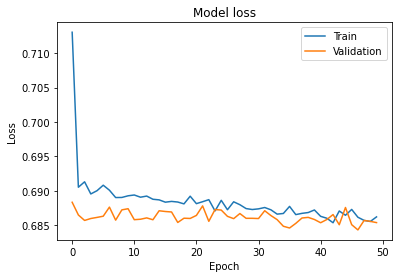

In [78]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


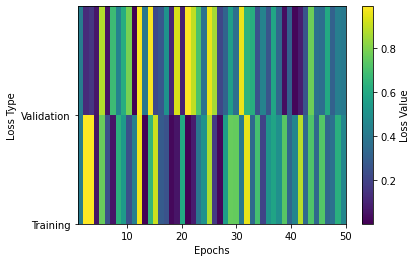

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
epochs = np.arange(1, 51)
train_loss = np.random.random(50)  # Replace with your train_loss values
val_loss = np.random.random(50)    # Replace with your val_loss values

# Stack the losses
all_loss = np.vstack([train_loss, val_loss])

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data as an image, i.e., on a 2D regular raster.
c = ax.imshow(all_loss, interpolation='nearest', origin='lower', aspect='auto', cmap='viridis', extent=[1, 50, 0, 2])

# To label y-axis
ax.set_yticks([0, 1])
ax.set_yticklabels(['Training', 'Validation'])

plt.xlabel('Epochs')
plt.ylabel('Loss Type')
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Loss Value')

plt.show()


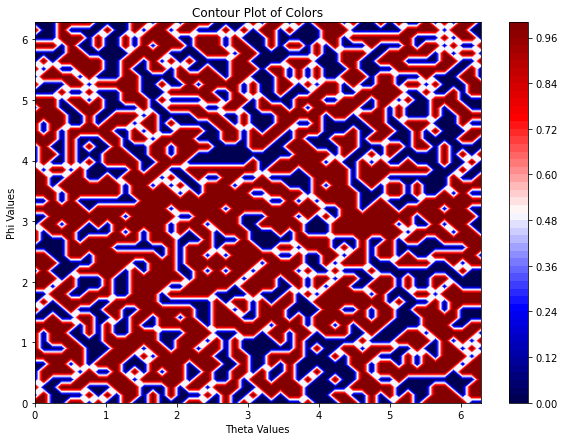

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data
theta_values = np.array(data['theta_values'])
phi_values = np.array(data['phi_values'])
colors = np.array(data['colors'])

# Convert colors to numerical values
color_values = np.where(colors == 'red', 1, 0)

# Reshape data into a grid
theta_unique = np.unique(theta_values)
phi_unique = np.unique(phi_values)

theta_grid, phi_grid = np.meshgrid(theta_unique, phi_unique)
color_grid = color_values.reshape(theta_unique.size, phi_unique.size)

# Plot contour map
plt.figure(figsize=(10, 7))
contour = plt.contourf(theta_grid, phi_grid, color_grid, cmap='seismic', levels=50)
plt.colorbar(contour)

plt.xlabel('Theta Values')
plt.ylabel('Phi Values')
plt.title('Contour Plot of Colors')
plt.show()


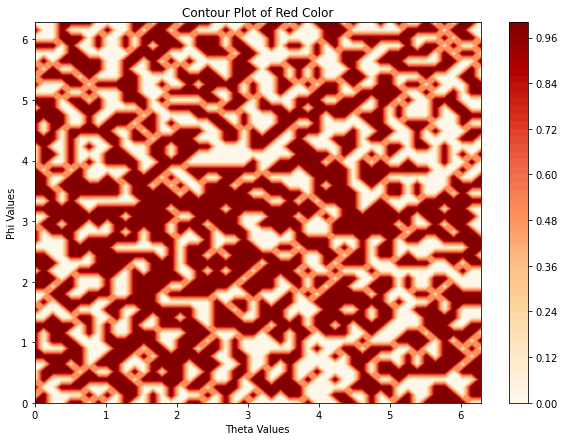

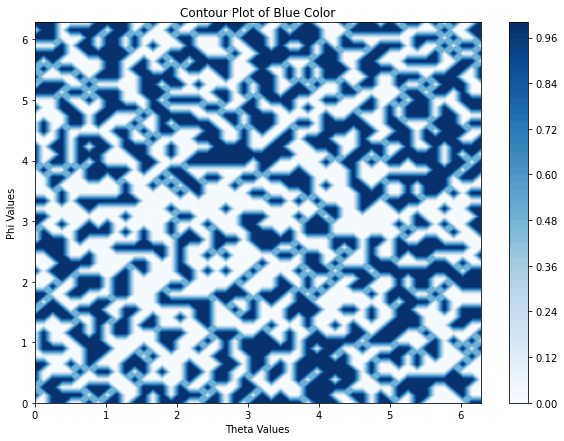

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data
theta_values = np.array(data['theta_values'])
phi_values = np.array(data['phi_values'])
colors = np.array(data['colors'])

# Convert colors to numerical values for red and blue
red_values = np.where(colors == 'red', 1, 0)
blue_values = np.where(colors == 'blue', 1, 0)

# Reshape data into a grid
theta_unique = np.unique(theta_values)
phi_unique = np.unique(phi_values)

theta_grid, phi_grid = np.meshgrid(theta_unique, phi_unique)
red_grid = red_values.reshape(theta_unique.size, phi_unique.size)
blue_grid = blue_values.reshape(theta_unique.size, phi_unique.size)

# Plot contour map for red
plt.figure(figsize=(10, 7))
plt.contourf(theta_grid, phi_grid, red_grid, cmap='OrRd', levels=50)
plt.colorbar()
plt.xlabel('Theta Values')
plt.ylabel('Phi Values')
plt.title('Contour Plot of Red Color')
plt.show()

# Plot contour map for blue
plt.figure(figsize=(10, 7))
plt.contourf(theta_grid, phi_grid, blue_grid, cmap='Blues', levels=50)
plt.colorbar()
plt.xlabel('Theta Values')
plt.ylabel('Phi Values')
plt.title('Contour Plot of Blue Color')
plt.show()
